In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [45]:
pwd

'D:\\work\\mining\\Notes\\Notebook'

In [46]:
!cd..

In [47]:
demodata = pd.read_csv('..\Datasets\svmdemo.csv')

In [48]:
demodata

,Class,X1,X2
0,-1,1.00,1.00
1,-1,-1.00,1.00
2,-1,1.00,-1.00
3,-1,-1.00,-1.00
4,-1,0.00,0.00
5,-1,1.25,-1.30
6,-1,-1.30,1.25
7,-1,-1.30,-1.30
8,-1,-1.40,1.10
9,-1,1.40,1.10


In [49]:
import matplotlib.pyplot as plt

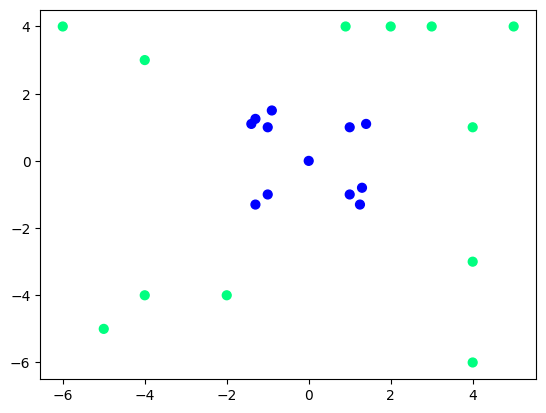

In [50]:
X = np.array(demodata)
plt.scatter(X[:,1], X[:,2], c=X[:,0], s=40, cmap='winter')
plt.show()

In [51]:
# model = LogisticRegression()
#model = SVC(kernel = 'linear')
model = SVC(kernel = 'poly',degree = 2,verbose=True)
#model = SVC(kernel = 'poly', degree = 2, C = 100000)
#model = SVC()

In [52]:
# ?SVC

In [53]:
X = demodata.drop('Class',axis = 1)
Y = demodata['Class']

In [54]:
X

,X1,X2
0,1.00,1.00
1,-1.00,1.00
2,1.00,-1.00
3,-1.00,-1.00
4,0.00,0.00
5,1.25,-1.30
6,-1.30,1.25
7,-1.30,-1.30
8,-1.40,1.10
9,1.40,1.10


In [55]:
model.fit(X,Y)

[LibSVM]

SVC(degree=2, kernel='poly', verbose=True)

In [56]:
pred = model.predict(X)

In [57]:
confusion_matrix(pred,Y)

array([[12,  0],
       [ 0, 12]], dtype=int64)

In [58]:
model.support_vectors_ 

array([[ 1.25, -1.3 ],
       [-1.3 ,  1.25],
       [-1.3 , -1.3 ],
       [ 1.4 ,  1.1 ],
       [ 4.  , -3.  ],
       [ 4.  ,  1.  ],
       [ 0.9 ,  4.  ],
       [-2.  , -4.  ]])

In [59]:
?model

In [61]:
x, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

NameError: name 'make_blobs' is not defined

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)